Лабораторна робота №8 Тема: Розробка нейронної мережі з використанням бібліотеки KERAS

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [4]:
# Завдання 1
# Побудувати звичайну багатошарову нейронну мережу для датасету fashion_mnist
# 1. Завантажити датасет

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


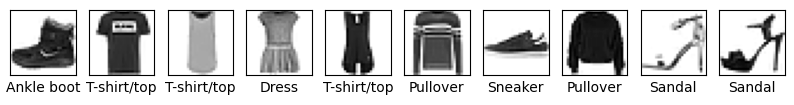

In [6]:
# 2. Роздрукувати 10 зображень.

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
# 3. Підготовувати дані, побудувати архітектуру.
train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(250, activation='relu'),
    layers.Dense(113, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 250)                 │         128,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 113)                 │          28,363 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,673 (2.13 MB)

 Trainable params: 559,673 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 4. Використати ранню зупинку і зменшення швидкості для запобіганню перенавчанню.
# 5. Вивести архітектуру моделі.

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7886 - loss: 0.5897 - val_accuracy: 0.8494 - val_loss: 0.4142 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8656 - loss: 0.3682 - val_accuracy: 0.8501 - val_loss: 0.4034 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8805 - loss: 0.3207 - val_accuracy: 0.8745 - val_loss: 0.3584 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8852 - loss: 0.3055 - val_accuracy: 0.8731 - val_loss: 0.3462 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8965 - loss: 0.2755 - val_accuracy: 0.8625 - val_loss: 0.3890 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9017 - loss: 0.2683 - val_accuracy: 0.8784 - val_loss: 0.3522 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9170 - l

In [9]:
# 6. Зберегти модель на гугл диск.

from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

Mounted at /content/drive


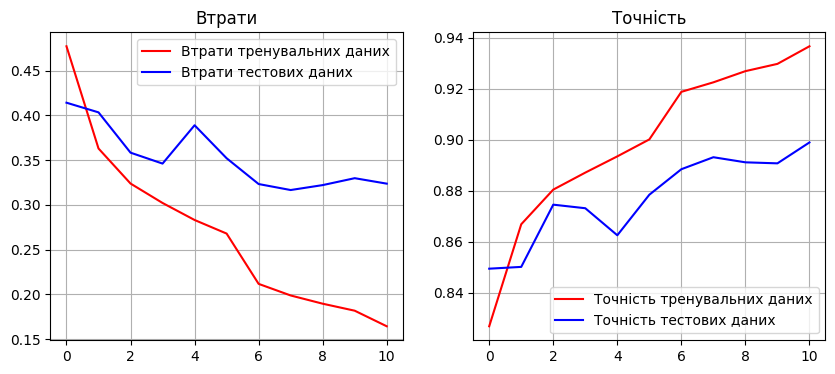

In [16]:
# 7. Побудувати графіки функції втрат і точності для тренувальних і тестових даних.

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Втрати тренувальних даних', color='red')
plt.plot(history.history['val_loss'], label='Втрати тестових даних', color='blue')
plt.title('Втрати')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точність тренувальних даних', color='red')
plt.plot(history.history['val_accuracy'], label='Точність тестових даних', color='blue')
plt.title('Точність')
plt.grid(True)
plt.legend()

plt.show()

In [17]:
# 8. Вивести класифікаційний звіт.

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(test_labels, predicted_labels, target_names=class_names))

313/313 - 1s - 3ms/step - accuracy: 0.8931 - loss: 0.3166
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.81      0.81      0.81      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.81      0.81      0.81      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.72      0.72      0.72      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



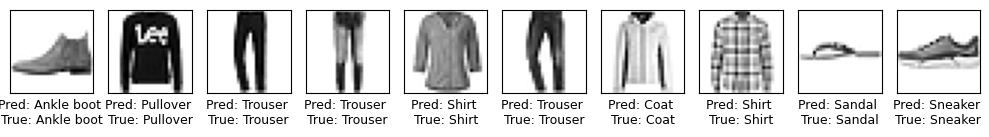

In [20]:
# 9. Результати розпізнавання із прогнозованим і справжнім класом

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]} \nTrue: {class_names[test_labels[i]]}", fontsize=9)
plt.tight_layout()
plt.show()

In [21]:
# Завдання 2

In [23]:
!pip install keras-tuner -q

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import RandomSearch

<ipython-input-23-339d8ebf5b10>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [24]:
# 1. Побудувати нейронну мережу, аналогічну завданню 1 для датасета fashion_mnist

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [25]:
# 2. Використати Keras Tuner підбору гіперпараметрів моделі.

def build_model(hp):
    model = keras.Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=35,
                                     max_value=512,
                                     step=32),
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [26]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_classification'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()
best_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Тестова точність:', test_acc)
print('Тестові втрати:', test_loss)

Trial 10 Complete [00h 03m 55s]
val_accuracy: 0.8690999746322632

Best val_accuracy So Far: 0.8988000154495239
Total elapsed time: 00h 47m 07s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 483)                 │         379,155 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 483)                 │           1,932 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 483)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 483)                 │         233,772 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 483)                 │           1,932 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 483)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 195)                 │          94,380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 195)                 │             780 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 195)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 99)                  │          19,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 99)                  │             396 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 99)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 732,751 (2.80 MB)

 Trainable params: 730,231 (2.79 MB)

 Non-trainable params: 2,520 (9.84 KB)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9013 - loss: 0.3465 - val_accuracy: 0.8773 - val_loss: 0.4263 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8967 - loss: 0.3672 - val_accuracy: 0.8799 - val_loss: 0.4334 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8926 - loss: 0.3717 - val_accuracy: 0.8823 - val_loss: 0.4137 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8921 - loss: 0.3771 - val_accuracy: 0.8779 - val_loss: 0.4308 - learning_rate: 1.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8977 - loss: 0.3711 - val_accuracy: 0.8829 - val_loss: 0.4185 - learning_rate: 1.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8939 - loss: 0.3748 - val_accuracy: 0.8820 - val_loss: 0.4193 - learning_rate: 1.0000e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms

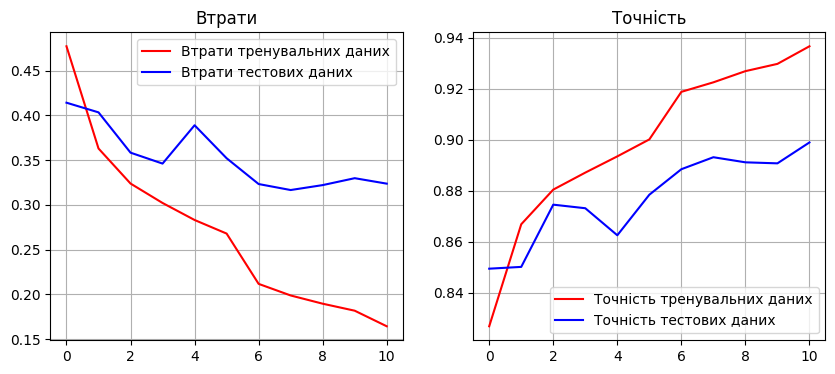

In [27]:
# 3. Порівняти результати завдання 1 і 2 (точність і функцію втрат).
# Написати висновки.
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Втрати тренувальних даних', color='red')
plt.plot(history.history['val_loss'], label='Втрати тестових даних', color='blue')
plt.title('Втрати')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точність тренувальних даних', color='red')
plt.plot(history.history['val_accuracy'], label='Точність тестових даних', color='blue')
plt.title('Точність')
plt.grid(True)
plt.legend()

plt.show()

313/313 - 0s - 2ms/step - accuracy: 0.8931 - loss: 0.3166
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.81      0.81      0.81      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.81      0.81      0.81      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.72      0.72      0.72      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



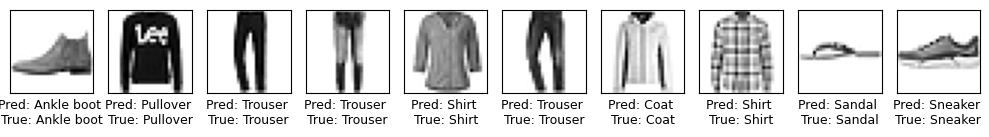

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(test_labels, predicted_labels, target_names=class_names))

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]} \nTrue: {class_names[test_labels[i]]}", fontsize=9)
plt.tight_layout()
plt.show()

Висновок: У ході виконання лабораторної роботи була розроблено дві нейронних мережі із датасету Fashion MNIST. Перша мережа була побудована та навчена за стандартним алгоритмом, тоді як друга була побудована з використанням фреймворку Keras Tuner. Використання цього фреймворку призвело то покращення точності результатів та меньшої кількості втрат даних у порівняні з першою мережею. Результати роботи були завантажені на відповідний Github-репозиторій.